# Plotting SWOT outputs (from simulation in NATL60) 

## Imports

In [1]:
# no warnings in outputs
import warnings
warnings.filterwarnings('ignore')

# import libraries
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr # xarray missing !!!!
import cartopy.crs as ccrs # cartopy missing !!!!
import cartopy.feature as cfeature

# imports to formate grid label
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

# import beautiful colormaps for o
import cmocean # cmocean missing !!!!



%matplotlib inline
 

## Load files

In [19]:
# --- Read SSH fields --- #
# set path and directories
pathdata = '/Users/sammymetref/Documents/Boost-Swot/Notebooks/GitHub/Personal_Files/2018/Data/'
 

nmonths=2  
for imonths in range(nmonths):
    # filename
    filename1 = 'NATL60-CJM165_y2012m'+np.str('{:02d}'.format(imonths+6))+'.1d.SSH.nc' # SSH field
    
    ''.join([pathdata, filename1])

    # read file with xarray
    ds1 = xr.open_dataset(''.join([pathdata, filename1])) 

    # load variables
    lon1 = ds1['nav_lon'][:,:] 
    lat1 = ds1['nav_lat'][:,:]
    ssh1=np.zeros_like(ds1['sossheig'])
    ndays=np.shape(ssh1)[0]
    if imonths==0:
        diffssh1=np.zeros([nmonths,np.shape(ssh1)[1],np.shape(ssh1)[2]],)
    for idays in range(0,ndays): 
        ssh1[idays,:,:] = ds1['sossheig'][idays,:,:]
        if idays>0:
            diffssh1[imonths,:,:]=diffssh1[imonths,:,:]+(ssh1[idays,:,:]-ssh1[idays-1,:,:])/ndays
        
        
   

# Visualization

In [20]:
# function to plot a dataset (model/swot simulation) in NATL60
def plot_ds(lon,lat,data,pos,cmap=plt.cm.rainbow,cblabel=None,title=None):
    # chose projection
    ax = fig.add_subplot(pos,projection=ccrs.PlateCarree())

    # plot
    pcolor=ax.pcolormesh(lon,lat,data,transform=ccrs.PlateCarree(),cmap=cmap,vmin=-0.1,vmax=0.1)#vmin=data.min(),vmax=data.max())#
    
    # set area to plot
    ilon1=-85
    ilon2=-35
    ilat1=30
    ilat2=50
    ax.set_extent([ilon1,ilon2,ilat1,ilat2])
    
    # set subtitle
    ax.set_title(title, fontsize=22)
    
    # define coastline
    ax.coastlines(resolution='10m', color='gray')
    
    # formate grid
    gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xlocator = mticker.FixedLocator(range(ilon1,ilon2+5,5))
    gl.ylocator = mticker.FixedLocator(range(ilat1,ilat2+5,5))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 12, 'color': 'gray'}
    gl.ylabel_style = {'size': 12, 'color': 'gray'} 

    # position, orientation, size and legend of colorbar
    cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.7,label=cblabel)

# function to visulize a swot trace on top of the background/ model
# (possibly need to adapted vmin,vmax)
def add_trace(lon,lat,data,pos,cmap=plt.cm.rainbow,cblabel=None):
    # chose projection
    ax = fig.add_subplot(pos,projection=ccrs.PlateCarree())
    # plot
    pcolor=ax.pcolormesh(lon,lat,data,cmap=cmap)
    #pcolor=ax.pcolormesh(lon,lat,data,transform=ccrs.PlateCarree(),cmap=cmap,vmin=data.min(),vmax=data.max())
     

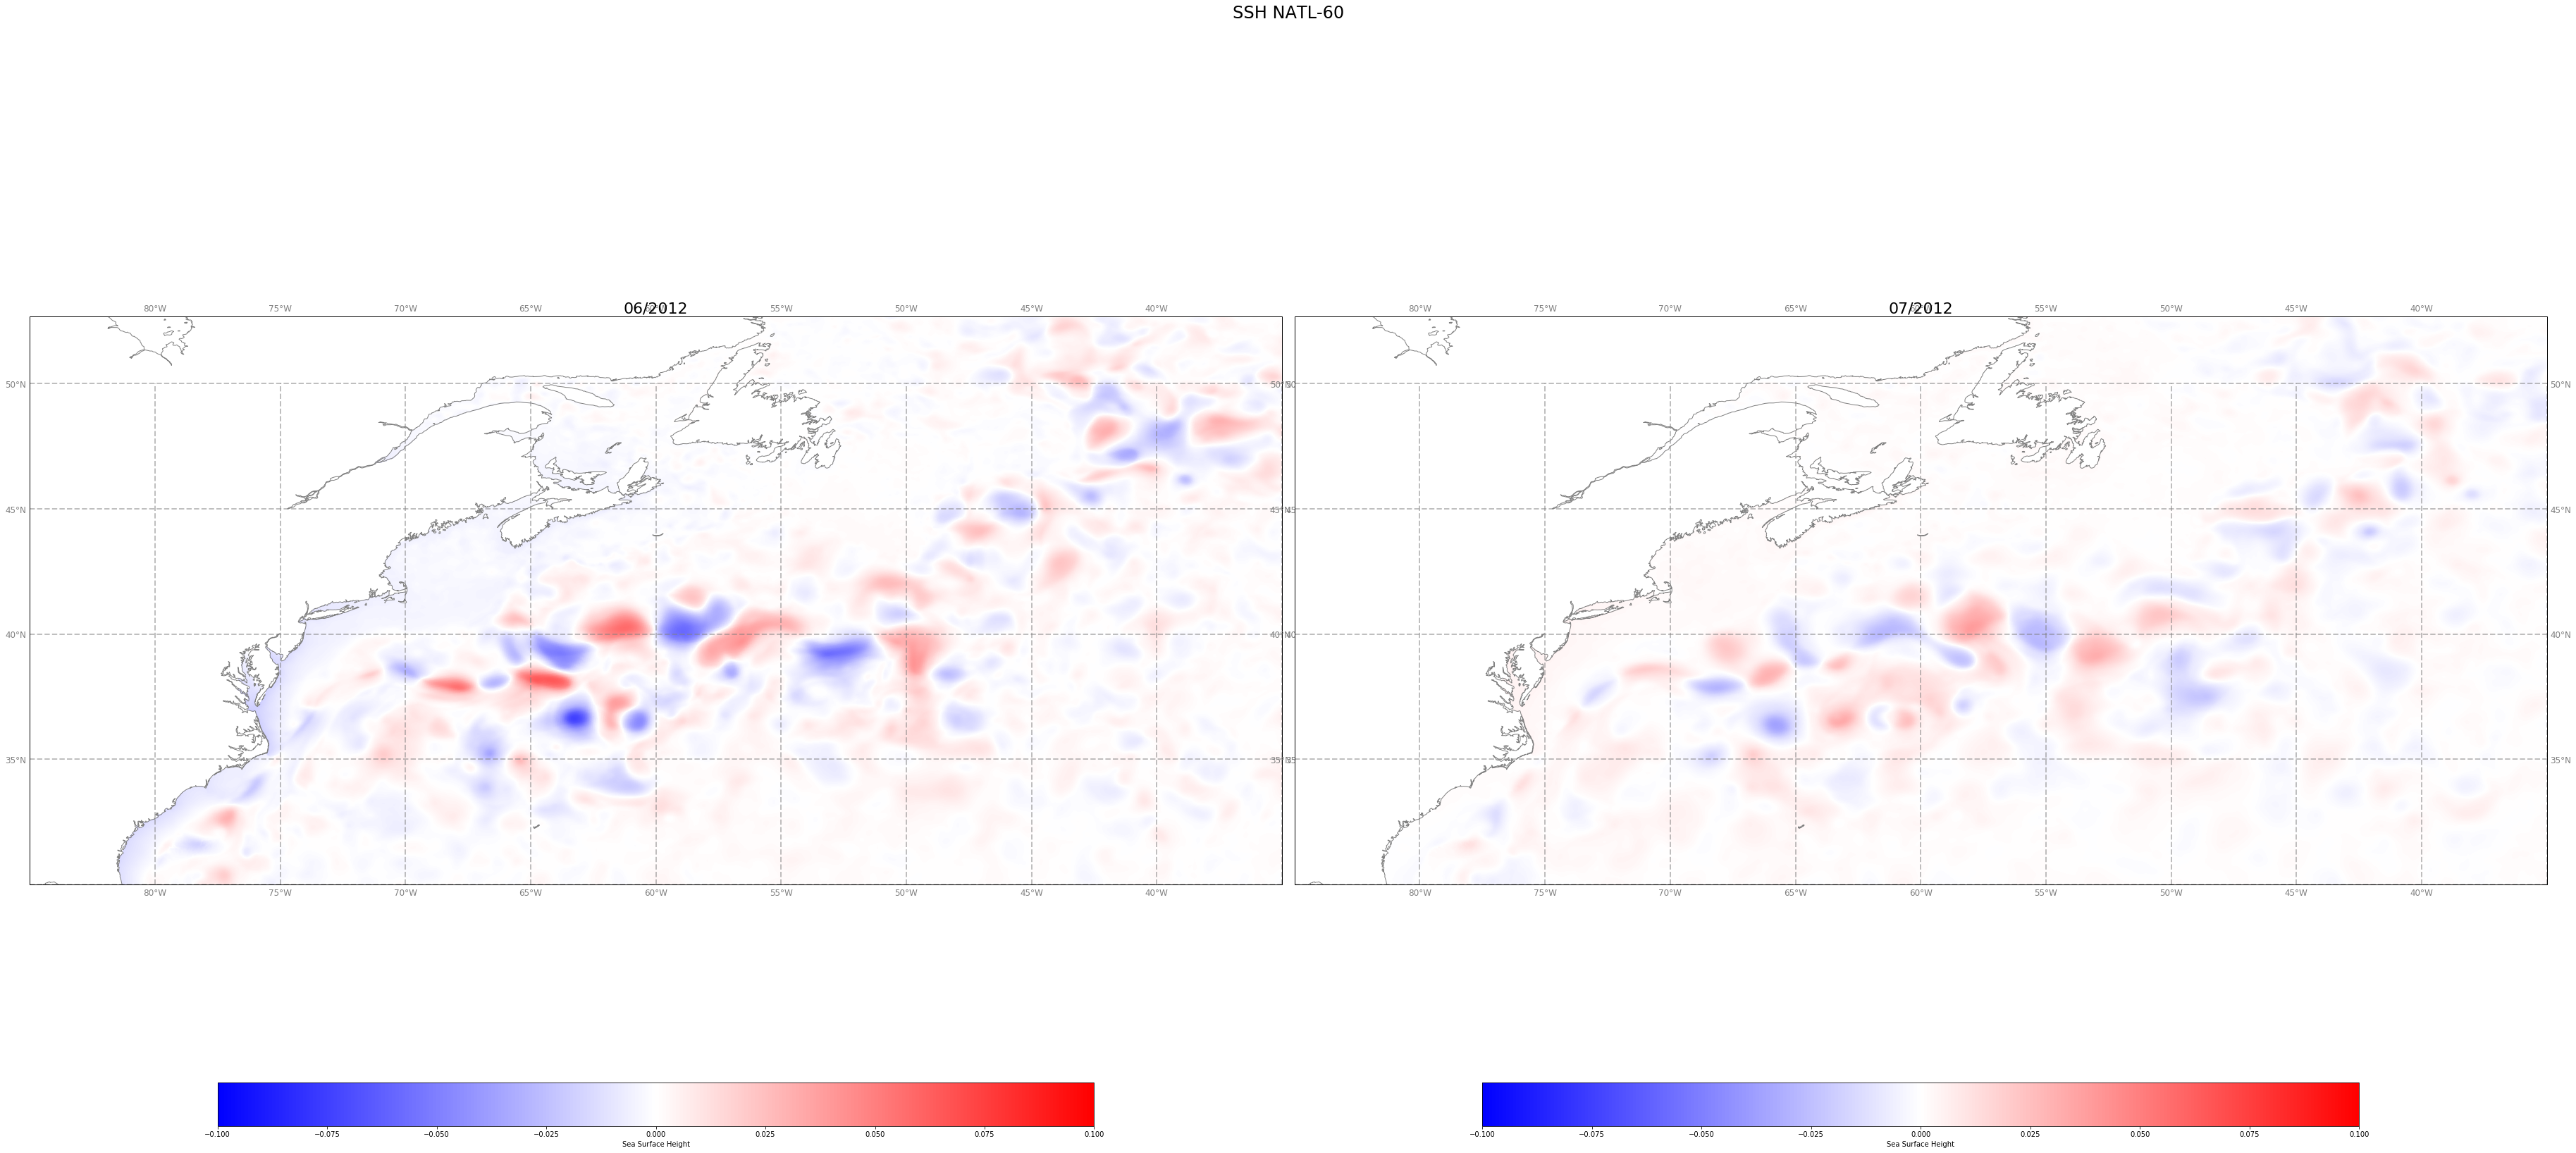

In [22]:
# size of the figure
fig = plt.figure(figsize=(50,50))


# figure title
fig.suptitle("SSH NATL-60", fontsize=24) 
# SSH
isubplot=int(nmonths/1)*100+2*10 
for imonths in range(nmonths):
    isubplot=isubplot+1 
    plot_ds(lon1,lat1,diffssh1[imonths,:,:],isubplot,'bwr','Sea Surface Height',np.str('{:02d}'.format(imonths+6))+'/2012') 
    plt.tight_layout()

# Here is the test 